In [1]:
import pandas as pd

In [2]:
# load the data
df_train = pd.read_csv('../data/processed/application_train.csv')
df_test = pd.read_csv('../data/processed/application_test.csv')


In [3]:
# Define the target and features
target = 'TARGET'
features = [c for c in df_train.columns if c not in [target]]

In [4]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size=0.2, random_state=42)

In [5]:
# Create the model with 100 trees
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,
                                 random_state=42,
                                    n_jobs=-1,
                                    verbose=1)

# Fit on training data
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the roc auc
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, y_pred)
print('ROC AUC: %0.4f' % roc_value)


ROC AUC: 0.5000


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [7]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.8s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   4.3s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=  15.3s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   3.6s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=  15.2s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   4.3s
[CV] END max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1.4s
[CV] END max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   1

[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.8s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   3.1s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   4.9s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   3.1s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   3.0s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, 

[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=  15.8s
[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.5s
[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  16.0s
[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   3.6s
[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=  16.6s
[CV] END max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=  14.1s
[CV] END max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.5s
[CV] END max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=  13.1s
[CV] END max_depth=90, max_features=2, min_samples_le

[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=  12.4s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.8s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   1.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   1.1s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   1.2s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   2.1s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   2.8s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   3.9s
[CV] END max_depth=90, max_features=2, min_samples_leaf=

[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.2s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.0s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  13.0s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   3.5s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=  13.0s
[CV] END max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   3.7s
[CV] END max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END max_depth=100, max_features=2, min_sam

[CV] END max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=  17.0s
[CV] END max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  14.6s
[CV] END max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   4.7s
[CV] END max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=  15.2s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   4.6s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=  16.5s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  15.3s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   4.0s
[CV] END max_depth=100, max_features=3, min_sa

{'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [8]:
# Create the model with 100 trees
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,
                                    random_state=42,
                                    n_jobs=-1,
                                    verbose=1,
                                    max_depth=80,
                                    max_features=2,
                                    min_samples_leaf=3,
                                    min_samples_split=8)

# Fit on training data
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, n_jobs=-1, random_state=42,
                       verbose=1)

In [9]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the roc auc
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, y_pred)
print('ROC AUC: %0.4f' % roc_value)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %0.4f' % accuracy)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision: %0.4f' % precision)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: %0.4f' % recall)

# F1
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1: %0.4f' % f1)

ROC AUC: 0.5000
Accuracy: 0.9454
Precision: 0.0000
Recall: 0.0000
F1: 0.0000


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

[CV] END max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   4.3s
[CV] END max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=  15.9s
[CV] END max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.3s
[CV] END max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  16.7s
[CV] END max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=  15.5s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   4.0s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=  15.3s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.6s
[CV] END max_depth=100, max_features=3, min_samp

/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

[CV] END max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  12.8s
[CV] END max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   3.5s
[CV] END max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=  13.3s
[CV] END max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   4.4s
[CV] END max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=  17.4s
[CV] END max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=  15.7s
[CV] END max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   5.6s
[CV] END max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=  16.1s
[CV] END max_depth=110, max_features=3, min_s

/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   4.6s
[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=  15.6s
[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   4.5s
[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=  15.8s
[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=  16.0s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   4.6s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=  13.4s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   4.5s
[CV] END max_depth=110, max_features=3, min_samp

/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.9s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   2.7s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   3.7s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   4.4s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   3.6s
[CV] END max_depth=110, max_features=3, min_samples_

/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.0min
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 1.2min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  53.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time= 1.1min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  44.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  45.8s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=  31.5s
[CV] END bootstrap=False, max_depth=

/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/nidhal/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [11]:
# new experiment in mlflow
import mlflow
mlflow.set_experiment('random_forest')

# log the model
with mlflow.start_run():
    mlflow.log_param('n_estimators', 100)
    mlflow.log_param('max_depth', 80)
    mlflow.log_param('max_features', 2)
    mlflow.log_param('min_samples_leaf', 3)
    mlflow.log_param('min_samples_split', 8)
    mlflow.log_metric('roc_auc', roc_value)
    mlflow.sklearn.log_model(model, 'model')


TypeError: 'NoneType' object does not support item assignment

In [12]:
# save the model
import joblib
joblib.dump(model, '../models/random_forest.pkl')

['../models/random_forest.pkl']

In [29]:
import shap

X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size=0.2, random_state=42)
# Build a TreeExplainer and compute SHAP values
explainer = shap.TreeExplainer(model, X_train)
shap_values = explainer(X_test, check_additivity=False)


100%|===================| 3437/3442 [01:22<00:00]        

In [30]:
X_test

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
5839,344617,0,225000.0,1159515.0,32013.0,1012500.0,0.007275,-14071,-658,-8210.0,...,0,0,0,0,0,1,0,0,1,0
4275,277053,0,189000.0,225000.0,18040.5,225000.0,0.022630,-10329,-1068,-746.0,...,0,1,0,0,0,0,0,0,1,0
6086,354619,0,234000.0,1154520.0,45913.5,1062000.0,0.020700,-21489,-858,-9970.0,...,0,0,0,0,0,1,0,0,1,0
8266,443181,1,1125000.0,1218555.0,84937.5,1125000.0,0.072500,-12031,-883,-6100.0,...,0,1,0,0,0,0,0,0,1,0
5493,328721,0,360000.0,1971072.0,62019.0,1800000.0,0.010010,-10688,-229,-5270.0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6198,358931,0,180000.0,1379376.0,40459.5,1080000.0,0.025160,-17490,-2068,-6070.0,...,0,0,0,0,0,1,0,0,1,0
425,119141,0,157500.0,450000.0,22018.5,450000.0,0.018800,-13484,-174,-6116.0,...,0,0,0,0,0,0,1,0,1,0
188,108607,0,450000.0,1081179.0,45936.0,927000.0,0.046230,-12976,-385,-4550.0,...,0,0,0,0,0,0,1,0,1,0
3995,265884,0,157500.0,270000.0,13500.0,270000.0,0.022630,-15035,-1538,-9176.0,...,0,0,0,0,0,1,0,0,1,0


In [31]:
shap_values[0]

.values =
array([[ 5.11328573e-04, -5.11328480e-04],
       [-2.95128890e-04,  2.95128799e-04],
       [-5.49539528e-05,  5.49540109e-05],
       [-9.20474130e-04,  9.20474513e-04],
       [-3.26425245e-04,  3.26425360e-04],
       [ 1.62617142e-03, -1.62617145e-03],
       [-2.26829927e-04,  2.26829848e-04],
       [ 4.75035811e-04, -4.75035901e-04],
       [-1.86166093e-03,  1.86166082e-03],
       [ 9.42315715e-05, -9.42313414e-05],
       [ 1.26563155e-03, -1.26563164e-03],
       [-4.85423060e-04,  4.85423308e-04],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [-1.03937395e-04,  1.03937389e-04],
       [ 0.00000000e+00,  0.00000000e+00],
       [-2.83095794e-05,  2.83096347e-05],
       [-5.07066346e-05,  5.07066462e-05],
       [-1.33085514e-03,  1.33085537e-03],
       [ 1.45311863e-04, -1.45312028e-04],
       [ 3.47874824e-04, -3.47874834e-04],
       [ 5.94529019e-05, -5.94528699e-05],
       [-4.60362711e-06,  4.60363296e-06],
 

In [36]:
shap.summary_plot(shap_values[:,:-1], X_test.iloc[0])
#shap.decision_plot(shap_values[0], X_test.iloc[0])

IndexError: tuple index out of range

TypeError: only integer scalar arrays can be converted to a scalar index

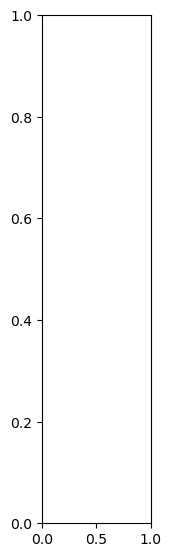

In [38]:
# Visualize explanations for all points of your data set at once
shap.summary_plot(shap_values, X_test, plot_type='bar')
#shap.summary_plot(shap_values, X_test, plot_type='dot')

TypeError: only integer scalar arrays can be converted to a scalar index

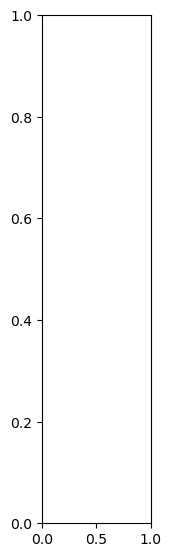

In [39]:
# Visualize a summary plot for each class on the whole dataset
shap.summary_plot(shap_values, X_test, class_names=y_test)